In [1]:
import pandas as pd
import plotly.express as px

In [2]:
from_eu_to_countries = pd.read_csv("DataBases/export_uk_to_eu.csv", encoding='latin-1')
from_countries_to_eu = pd.read_csv("DataBases/import_coutries_to_eu.csv", encoding='latin-1')

In [3]:
from_eu_to_uk = from_eu_to_countries.loc[from_eu_to_countries['TIME']=='United Kingdom', ['TIME', '2012', '2013', '2014', '2015', '2016', '2017', '2017', '2019', '2020', '2021']].reset_index()
from_eu_to_uk = from_eu_to_uk.drop(columns = {"index"})
from_uk_to_eu = from_countries_to_eu.loc[from_countries_to_eu['TIME']=='United Kingdom', ['TIME', '2012', '2013', '2014', '2015', '2016', '2017', '2017', '2019', '2020', '2021']].reset_index()
from_uk_to_eu = from_uk_to_eu.drop(columns = {"index"})

In [11]:
X = list(from_eu_to_uk.columns)
Y = list(from_eu_to_uk.iloc[0][:])
Y1 = list(from_uk_to_eu.iloc[0][:])

In [12]:
del X[0]
del Y[0]
del Y1[0]

In [9]:
for k in range(len(X)):
    Y[k]=float(Y[k])
    X[k]=float(X[k])
    Y1[k]=float(Y1[k])

In [10]:
Y1

[188552.5,
 183538.0,
 181920.3,
 184652.0,
 180391.4,
 191528.5,
 191528.5,
 194299.4,
 169045.7,
 147062.3]

In [11]:
data = pd.DataFrame()

In [12]:
data['year'] = X
data['from_eu_to_uk'] = Y
data['from_uk_to_eu'] = Y1

In [13]:
fig = px.line(data, x = 'year', y = ['from_eu_to_uk', 'from_uk_to_eu'], markers=True)
fig.show()

In [14]:
data

,year,from_eu_to_uk,from_uk_to_eu
0,2012.0,268776.8,188552.5
1,2013.0,273474.2,183538.0
2,2014.0,290922.6,181920.3
3,2015.0,316375.6,184652.0
4,2016.0,315862.0,180391.4
5,2017.0,320568.8,191528.5
6,2017.0,320568.8,191528.5
7,2019.0,320195.1,194299.4
8,2020.0,278302.5,169045.7
9,2021.0,283531.2,147062.3


In [13]:
import geopandas as gpd

ModuleNotFoundError: No module named 'geopandas'

In [16]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
list_countries_eu = ['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czechia', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany',
                     'Greece', 'Hungary', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands', 'Poland', 'Portugal',
                     'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'United Kingdom']

In [17]:
europe = world.loc[(world['name'].isin(list_countries_eu)),['name', 'iso_a3', 'geometry']].reset_index()

In [18]:
europe = europe.rename(columns = {'name' : 'country'})
europe = europe.drop(columns = {'index'})

In [19]:
europe = europe.set_crs("EPSG:3395", allow_override=True)

<AxesSubplot:>

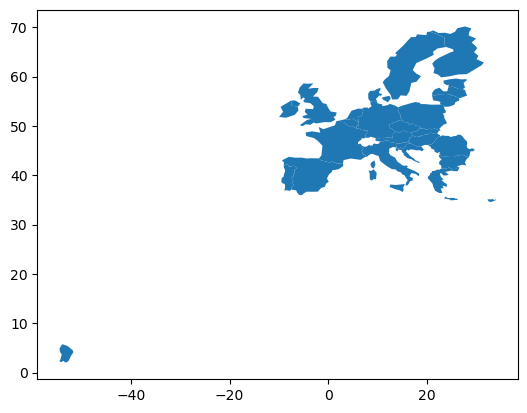

In [20]:
europe.plot()

In [21]:
import folium

In [22]:
m = europe.explore(column='country', legend = False, name='country')
folium.TileLayer('Stamen Toner', control=True).add_to(m) 
m

AttributeError: 'GeoDataFrame' object has no attribute 'explore'

In [14]:
import pandas as pd
import plotly.express as px

In [18]:
import_uk = pd.read_csv("DataBases/import.csv", encoding='latin-1')
export_uk = pd.read_csv("DataBases/export.csv", encoding='latin-1')

In [19]:
list_countries_eu = ['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czechia', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany',
                     'Greece', 'Hungary', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands', 'Poland', 'Portugal',
                     'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden']

In [20]:
import_uk = import_uk.loc[import_uk['Country Name'].isin(list_countries_eu),:].drop(columns = 'Country Code')
export_uk = export_uk.loc[export_uk['Country Name'].isin(list_countries_eu),:].drop(columns = 'Country Code')

In [21]:
import_uk = import_uk.melt(id_vars=["Country Name"], 
        var_name="Year", 
        value_name="Imports")
export_uk = export_uk.melt(id_vars=["Country Name"], 
        var_name="Year", 
        value_name="Exports")

In [22]:
export_uk['Year'] = export_uk['Year'].astype(int)
import_uk['Year'] = import_uk['Year'].astype(int)

In [23]:
import_uk = import_uk.loc[import_uk['Year']> 2010,:]
export_uk = export_uk.loc[export_uk['Year']> 2010,:]
data = pd.merge(import_uk, export_uk,  how='left', left_on=['Country Name', 'Year'], right_on = ['Country Name', 'Year'])
data['Balance of trade'] = data['Exports'] - data['Imports']

In [24]:
df = px.data.gapminder()
df = df.loc[df['continent']=='Europe']
df = df.groupby('iso_alpha').first().reset_index()
df

,iso_alpha,country,continent,year,lifeExp,pop,gdpPercap,iso_num
0,ALB,Albania,Europe,1952,55.230,1282697,1601.056136,8
1,AUT,Austria,Europe,1952,66.800,6927772,6137.076492,40
2,BEL,Belgium,Europe,1952,68.000,8730405,8343.105127,56
3,BGR,Bulgaria,Europe,1952,59.600,7274900,2444.286648,100
4,BIH,Bosnia and Herzegovina,Europe,1952,53.820,2791000,973.533195,70
5,CHE,Switzerland,Europe,1952,69.620,4815000,14734.232750,756
6,CZE,Czech Republic,Europe,1952,66.870,9125183,6876.140250,203
7,DEU,Germany,Europe,1952,67.500,69145952,7144.114393,276
8,DNK,Denmark,Europe,1952,70.780,4334000,9692.385245,208
9,ESP,Spain,Europe,1952,64.940,28549870,3834.034742,724


In [26]:
data = data.merge(df.loc[:,['country','iso_alpha']], left_on='Country Name', right_on='country').drop(columns = 'country')

In [27]:
data

,Country Name,Year,Imports,Exports,Balance of trade,iso_alpha_x,iso_alpha_y
0,Austria,2011,2964,1696,-1268,AUT,AUT
1,Austria,2012,2643,1561,-1082,AUT,AUT
2,Austria,2013,2862,1656,-1206,AUT,AUT
3,Austria,2014,3016,1662,-1354,AUT,AUT
4,Austria,2015,2984,1568,-1416,AUT,AUT
...,...,...,...,...,...,...,...
204,Sweden,2017,6942,5295,-1647,SWE,SWE
205,Sweden,2018,7189,5576,-1613,SWE,SWE
206,Sweden,2019,6521,5084,-1437,SWE,SWE
207,Sweden,2020,5555,4456,-1099,SWE,SWE


In [34]:
data.insert(0, 'iso_alpha', data.pop('iso_alpha'))

In [35]:
data

,iso_alpha,Country Name,Year,Imports,Exports,Balance of trade
0,AUT,Austria,2011,2964,1696,-1268
1,AUT,Austria,2012,2643,1561,-1082
2,AUT,Austria,2013,2862,1656,-1206
3,AUT,Austria,2014,3016,1662,-1354
4,AUT,Austria,2015,2984,1568,-1416
...,...,...,...,...,...,...
204,SWE,Sweden,2017,6942,5295,-1647
205,SWE,Sweden,2018,7189,5576,-1613
206,SWE,Sweden,2019,6521,5084,-1437
207,SWE,Sweden,2020,5555,4456,-1099


In [36]:
fig = px.choropleth(data,
                     locations = 'iso_alpha',
                     hover_name = "Country Name",
                     color_continuous_scale = 'rdylgn',
                     color = 'Balance of trade',
                     labels={'Balance of trade':'Balance of trade'},
                     animation_frame="Year",
                     projection = 'azimuthal equidistant',
                     scope = 'europe',
                     range_color=(-35000, 35000),
                     color_continuous_midpoint=0,
                     width = 1000,
                     height = 800)
#ADD POPULAION 
#add new layout, mlaybe the different before and after brect, maybe the share
fig.show()

In [37]:
data

,iso_alpha,Country Name,Year,Imports,Exports,Balance of trade
0,AUT,Austria,2011,2964,1696,-1268
1,AUT,Austria,2012,2643,1561,-1082
2,AUT,Austria,2013,2862,1656,-1206
3,AUT,Austria,2014,3016,1662,-1354
4,AUT,Austria,2015,2984,1568,-1416
...,...,...,...,...,...,...
204,SWE,Sweden,2017,6942,5295,-1647
205,SWE,Sweden,2018,7189,5576,-1613
206,SWE,Sweden,2019,6521,5084,-1437
207,SWE,Sweden,2020,5555,4456,-1099


In [38]:
min(data['Balance of trade'])

-32017

In [39]:
max(data['Balance of trade'])

8426